<a href="https://colab.research.google.com/github/Seki-Hiroyuki/karaXqueen/blob/main/SIRV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

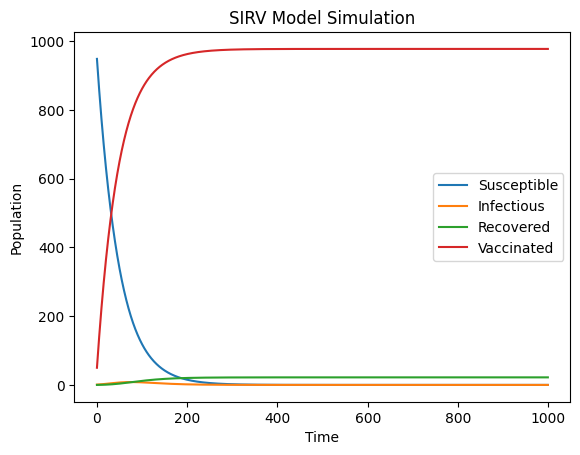

In [5]:
class SIRVModel:
 def __init__(self, N, beta, gamma, y0, v):
  self.N = N
  self.beta = beta
  self.gamma = gamma
  self.y0 = y0
  self.solution = None
  self.v = v

  # SIRV model differential equations
 def sirv_model(self, y, t):
  S, I, R, V = y
  dS = -self.beta * S * I / self.N - self.v * S
  dI = self.beta * S * I / self.N - self.gamma * I
  dR = self.gamma * I
  dV = self.v * S
  return np.array([dS, dI, dR, dV])

  # Euler method for a single step
 def euler_step(self, f, y, t, dt):
  y_next = y + dt * f(y, t)
  return y_next

 # Solve the SIRV model
 def solve(self, t_start, t_end, dt):
  n_steps = int((t_end - t_start) / dt)
  t = np.linspace(t_start, t_end, n_steps)
  self.solution = np.zeros((n_steps, len(self.y0)))
  self.solution[0] = self.y0
  for i in range(n_steps - 1):
   self.solution[i + 1] = self.euler_step(self.sirv_model, self.solution[i], t[i], dt)

 # Extract S, I, R, and V values from the solution
 def extract_values(self):
  S = self.solution[:, 0]
  I = self.solution[:, 1]
  R = self.solution[:, 2]
  V = self.solution[:, 3]
  return S, I, R, V


# Time parameters for SIRV simulation
N = 1000 # total population, N.
beta = 1 # infection spread dynamics
gamma = 0.2 # recovery rate
v = 0.2
S0 = 949
I0 = 1
R0 = 0
V0 = 50
y0 = [S0, I0, R0, V0] # initial conditions: one infected, rest susceptible
# Create an instance of the SIRVModel class
sirv_model = SIRVModel(N, beta, gamma, y0, v)
# Time stepping parameters
t_start = 0
t_end = 100
dt = 0.1

# Solve the SIRV model
sirv_model.solve(t_start, t_end, dt)
# Extract S, I, R, and V values
S, I, R, V = sirv_model.extract_values()
# Plot the results if needed
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infectious')
plt.plot(R, label='Recovered')
plt.plot(V, label='Vaccinated')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIRV Model Simulation')
plt.show()